In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score

Loading the dataset

In [11]:
data = pd.read_csv("./Housing.csv")

In [12]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Preprocessing

In [13]:
# Convert binary columns yes and no to 1 and 0
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for column in binary_columns:
    data[column] = data[column].map({'yes': 1, 'no': 0})

# Convert furnishingstatus to numerical values
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 0, 'unfurnished': -1})

In [14]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


Split data into training and testing sets (80/20 split)

In [15]:
X = data.drop(columns=['price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Correlation Heatmap

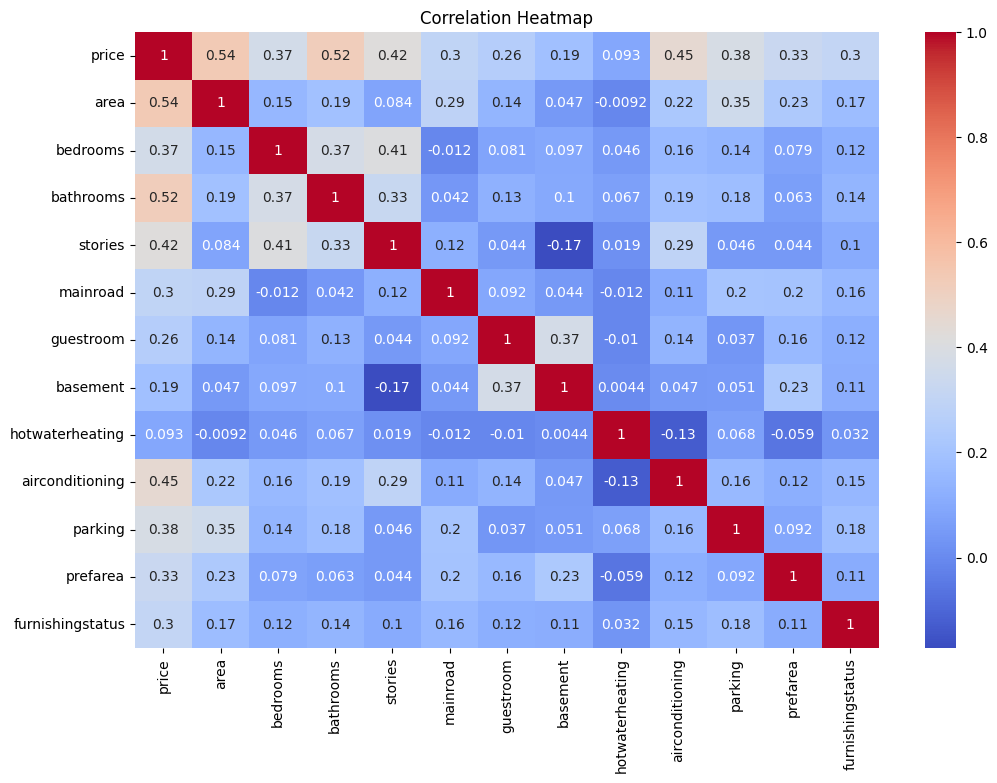

In [16]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

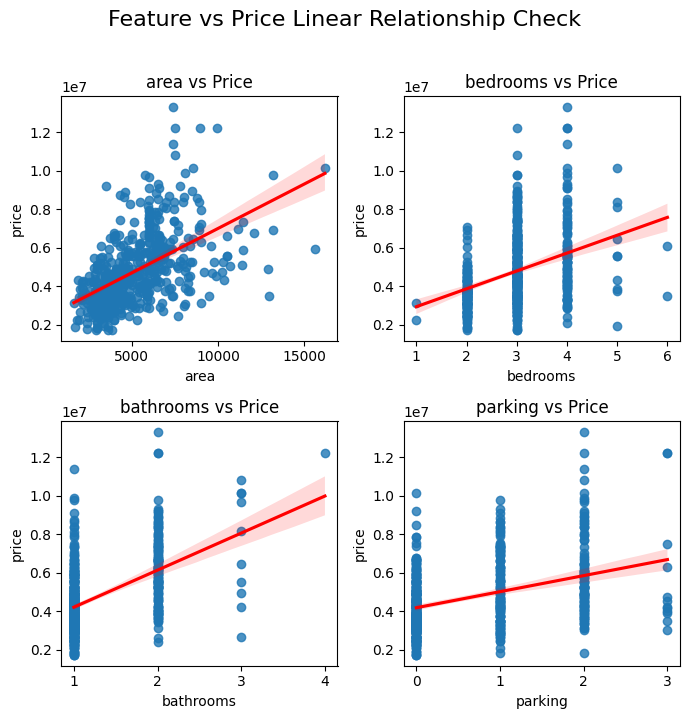

In [17]:
df = pd.DataFrame(data)
key_features = ['area', 'bedrooms', 'bathrooms', 'parking']
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

for idx, feature in enumerate(key_features):
    row, col = divmod(idx, 2)
    sns.regplot(
        x=feature, 
        y="price", 
        data=df, 
        ax=axes[row, col], 
        line_kws={"color": "red"}
    )
    axes[row, col].set_title(f"{feature} vs Price")

plt.suptitle("Feature vs Price Linear Relationship Check", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

Feature Selection

In [18]:
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]
print(f"Selected Features: {selected_features}")

Selected Features: Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking'], dtype='object')


Model Training

In [19]:
LR_model = LinearRegression()
LR_model.fit(X_train[selected_features], y_train)

LinearRegression()

In [20]:
k = 5
KNN_model = KNeighborsRegressor(n_neighbors=k)
KNN_model.fit(X_train[selected_features], y_train)

KNeighborsRegressor()

Model Evaluation

KNN Model Performance:
  Training MSE: 1389420143082.2935
  Test MSE: 3349007369541.284
  Test R² Score: 0.3374298493619282

Linear Regression Model Performance:
  Training MSE: 1217211760217.0059
  Test MSE: 2104079659093.142
  Test R² Score: 0.5837272890591468



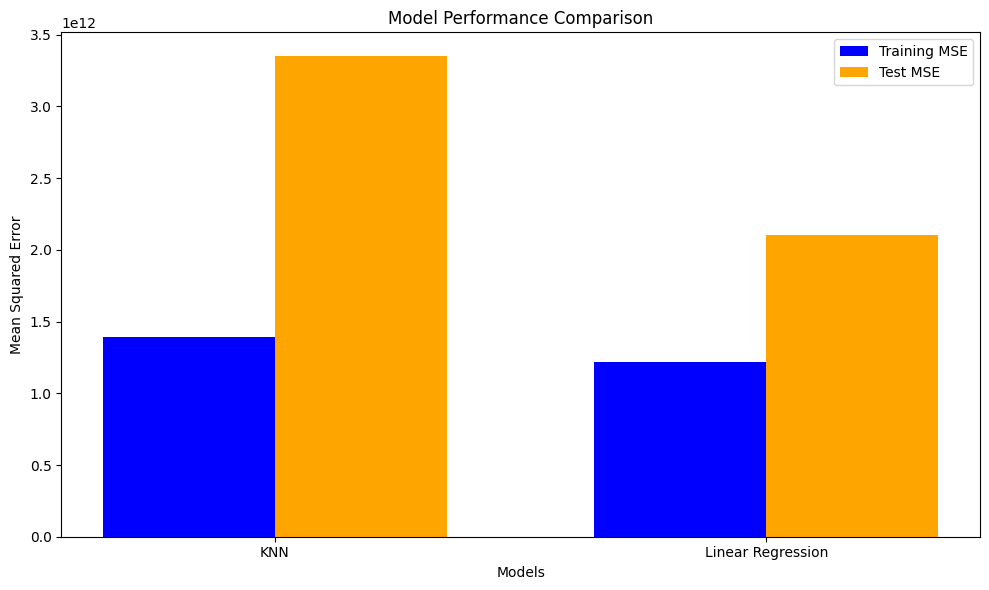

In [ ]:
def model_evaluation_plot(models, model_names):
    train_mse_values = []
    test_mse_values = []
    test_r2_values = []

    for model, name in zip(models, model_names):
        train_predictions = model.predict(X_train[selected_features])
        train_mse = mean_squared_error(y_train, train_predictions)
        train_mse_values.append(train_mse)

        test_predictions = model.predict(X_test[selected_features])
        test_mse = mean_squared_error(y_test, test_predictions)
        test_r2 = r2_score(y_test, test_predictions)
        test_mse_values.append(test_mse)
        test_r2_values.append(test_r2)

        print(f"{name} Model Performance:")
        print(f"  Training MSE: {train_mse}")
        print(f"  Test MSE: {test_mse}")
        print(f"  Test R² Score: {test_r2}")
        print()

    bar_width = 0.35
    indices = range(len(models))

    plt.figure(figsize=(10, 6))
    plt.bar(indices, train_mse_values, bar_width, label='Training MSE', color='blue')
    plt.bar([i + bar_width for i in indices], test_mse_values, bar_width, label='Test MSE', color='orange')

    plt.xlabel('Models')
    plt.ylabel('Mean Squared Error')
    plt.title('Model Performance Comparison')
    plt.xticks([i + bar_width / 2 for i in indices], model_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

models = [KNN_model, LR_model]
model_names = ["KNN", "Linear Regression"]

model_evaluation_plot(models, model_names)